In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('D:/Rick/Machine Learning/Datasets/breast_cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 32)

The dataset contains 569 rows and 32 columns, including the target variable.

In [5]:
# We will take a look at our types of data
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
# Below, we will check for any missing values
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There is no missing value in our data.

In [7]:
# to check whether there are any duplicates in our data.
data.index.is_unique

True

There is no duplicate row in this dataset.

In [3]:
data.drop('id', axis = 1, inplace = True)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The `id` variable in the dataset won't do much help in the prediction of the response. So, we will drop the `id` column from the dataset.

In [4]:
feature_cols = list(data.columns[1: ])
feature_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [10]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
data["diagnosis"].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

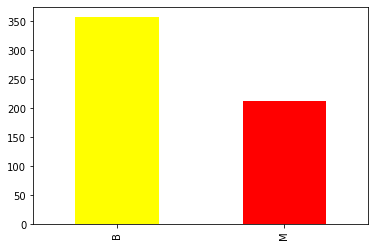

In [12]:
data["diagnosis"].value_counts().plot.bar(color = ['yellow', 'red'])
plt.show()

**Label Encoding**

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

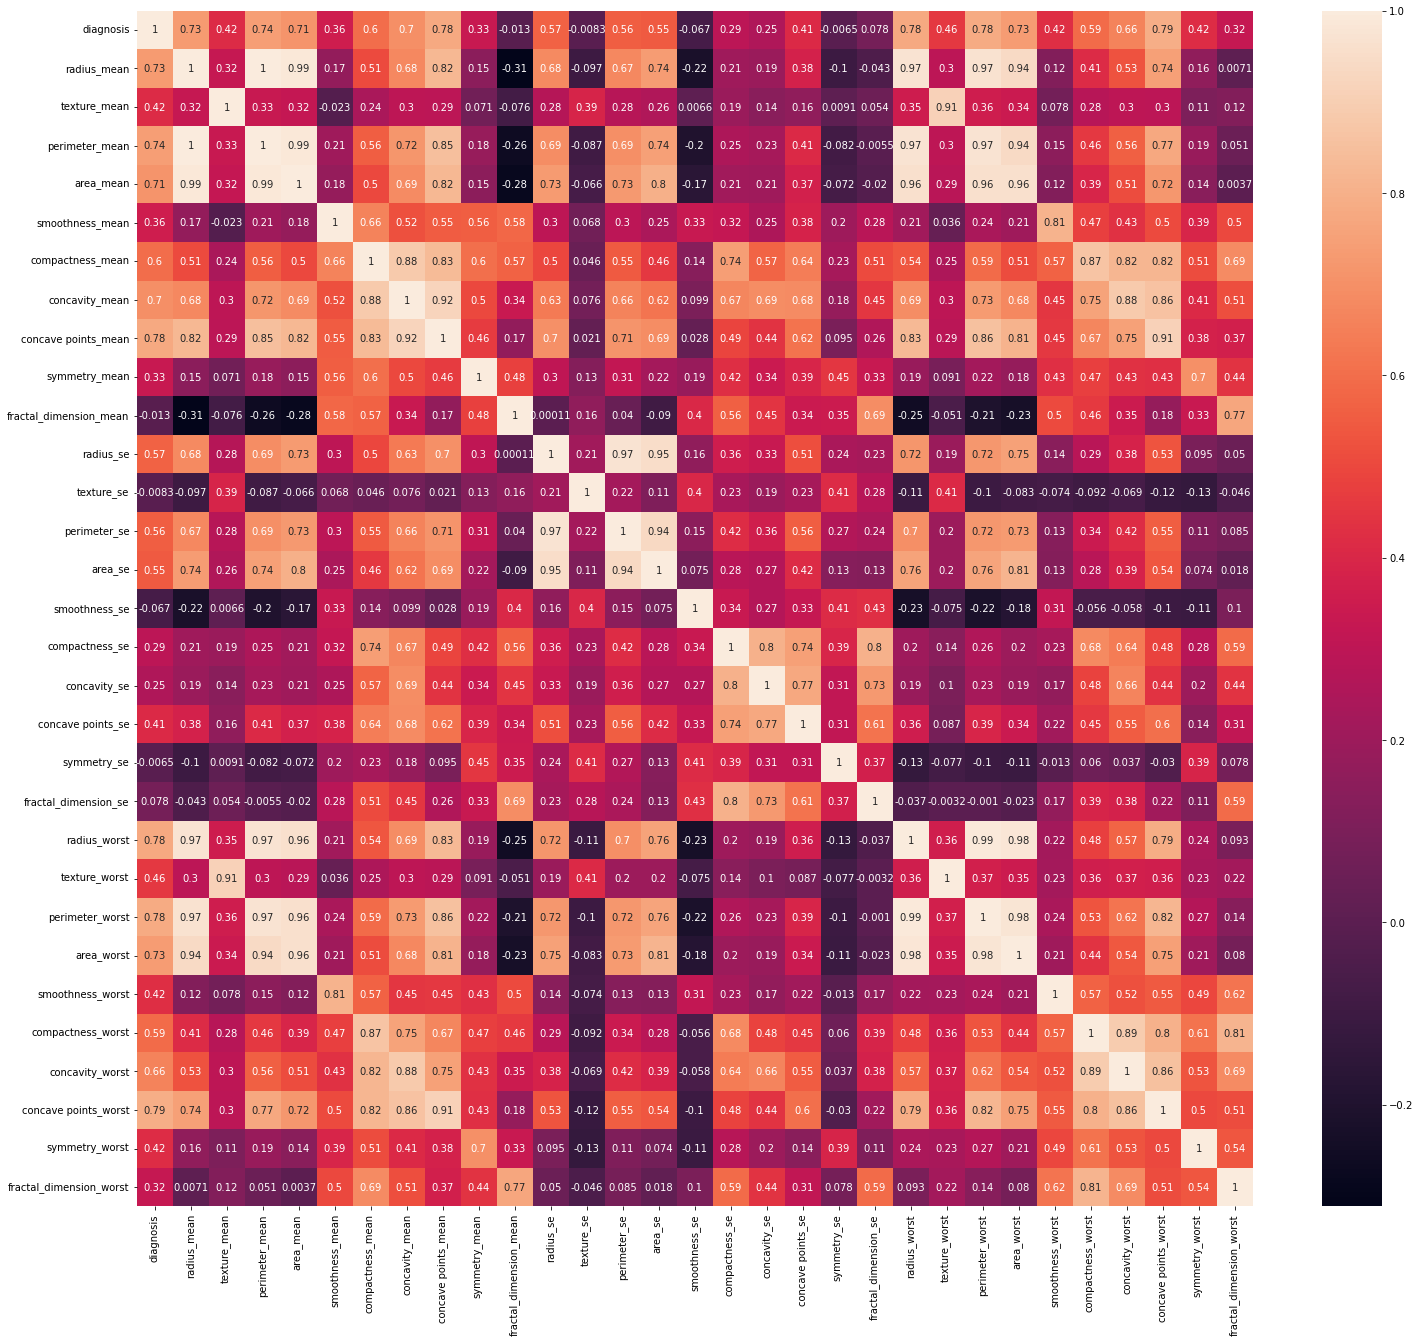

In [7]:
plt.figure(figsize = (25, 22))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Creating X and y**

In [8]:
X = data[feature_cols]
y = data['diagnosis']

## Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
print(f"The range of feature inputs are within {X.min():0.2f} to {X.max():0.2f}")

The range of feature inputs are within 0.00 to 1.00


In [12]:
X = pd.DataFrame(X, columns = feature_cols)

## Train Test Split

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
train_idx, test_idx = next(strat_shuf_split.split(X, y))

In [15]:
# Create the dataframes
X_train = X.iloc[train_idx]
y_train = y[train_idx]

X_test = X.iloc[test_idx]
y_test = y[test_idx]

In [16]:
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")

Number of training samples: 398
Number of test samples: 171


In [28]:
y_train.value_counts(normalize = True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [29]:
y_test.value_counts(normalize = True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr_model = LogisticRegression()

In [60]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [61]:
{col: round(coef, 3) for col, coef in zip(feature_cols, lr_model.coef_.ravel())}

{'radius_mean': 1.75,
 'texture_mean': 1.533,
 'perimeter_mean': 1.719,
 'area_mean': 1.482,
 'smoothness_mean': 0.703,
 'compactness_mean': 0.442,
 'concavity_mean': 1.179,
 'concave points_mean': 1.92,
 'symmetry_mean': 0.449,
 'fractal_dimension_mean': -0.719,
 'radius_se': 1.146,
 'texture_se': 0.057,
 'perimeter_se': 0.891,
 'area_se': 0.756,
 'smoothness_se': -0.019,
 'compactness_se': -0.617,
 'concavity_se': -0.285,
 'concave points_se': 0.274,
 'symmetry_se': -0.169,
 'fractal_dimension_se': -0.572,
 'radius_worst': 2.156,
 'texture_worst': 2.124,
 'perimeter_worst': 1.986,
 'area_worst': 1.576,
 'smoothness_worst': 1.294,
 'compactness_worst': 0.657,
 'concavity_worst': 1.103,
 'concave points_worst': 2.264,
 'symmetry_worst': 1.289,
 'fractal_dimension_worst': 0.232}

In [62]:
lr_pred = lr_model.predict(X_test)
lr_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [17]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [18]:
def evaluate_metrics(yt, yp):
    precision, recall, fscore, _ = score(yt, yp, average = 'binary')
    print(classification_report(yt, yp))
    print('Accuracy:  ', round(accuracy_score(yt, yp), 2))
    print('Precision: ', round(precision, 2))
    print('Recall:    ', round(recall, 2))
    print('F1 Score:  ', round(fscore, 2))

In [65]:
evaluate_metrics(y_test, lr_pred)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy:   0.97
Precision:  1.0
Recall:     0.92
F1 Score:   0.96


## K Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
max_k = 40

f1_error = list()

for k in range(1, max_k+1):
    
    knn_model =  KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    knn_model.fit(X_train, y_train)
    
    knn_pred = knn_model.predict(X_test)
    
    f1 = f1_score(y_test, knn_pred)
    error = 1 - accuracy_score(y_test, knn_pred)
    
    f1_error.append((k, f1, error))

f1_error_results = pd.DataFrame(f1_error, columns = ['K', 'F1 Score', 'Error Rate']).set_index('K')

In [21]:
f1_error_results

,F1 Score,Error Rate
K,,
1,0.920635,0.058480
2,0.920635,0.058480
3,0.959350,0.029240
4,0.960000,0.029240
5,0.959350,0.029240
6,0.960000,0.029240
7,0.959350,0.029240
8,0.976000,0.017544
9,0.967742,0.023392


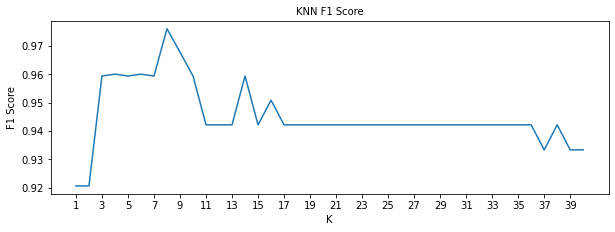

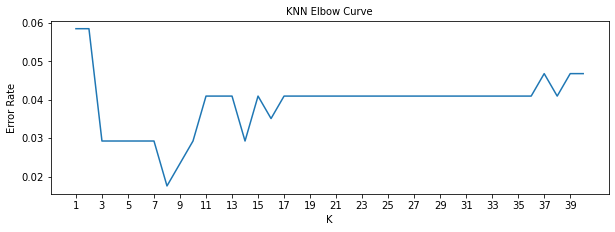

In [71]:
plt.figure(figsize = (10, 7))
plt.subplot(2, 1, 1)
sns.lineplot(x = 'K', y = 'F1 Score', data = f1_error_results)
plt.xticks(range(1, max_k, 2))
plt.title('KNN F1 Score', fontsize = 10)
plt.xlabel('K', fontsize = 10)
plt.ylabel('F1 Score', fontsize = 10)
plt.show()

plt.figure(figsize = (10, 7))
plt.subplot(2, 1, 2)
sns.lineplot(x = 'K', y = 'Error Rate', data = f1_error_results)
plt.xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve', fontsize = 10)
plt.xlabel('K', fontsize = 10)
plt.ylabel('Error Rate', fontsize = 10)
plt.show()

In [72]:
knn_model =  KNeighborsClassifier(n_neighbors = 8, weights = 'distance')
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
knn_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [73]:
evaluate_metrics(y_test, knn_pred)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Accuracy:   0.98
Precision:  1.0
Recall:     0.95
F1 Score:   0.98


## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
dt.tree_.node_count, dt.tree_.max_depth, dt.min_samples_split

(37, 8, 2)

In [78]:
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

train_test_dt_accuracy = pd.Series({'train': accuracy_score(y_train, dt_train_pred), 
                                    'test': accuracy_score(y_test, dt_test_pred)}, name = 'Accuracy').to_frame().T

train_test_dt_accuracy

,train,test
Accuracy,1.0,0.900585


In [79]:
max_depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]

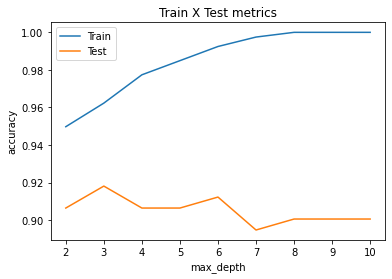

In [80]:
accuracy_train_list = []
accuracy_test_list = []

for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

plt.title('Train X Test metrics')
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_list)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)), labels = max_depth_list)
plt.legend(['Train', 'Test'])
plt.show()

In [81]:
min_samples_split_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 25, 30]

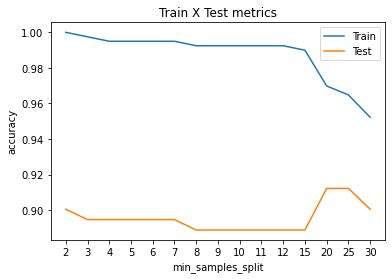

In [82]:
accuracy_train_list = []
accuracy_test_list = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

plt.title('Train X Test metrics')
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_list)
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels = min_samples_split_list)
plt.legend(['Train', 'Test'])
plt.show()

In [83]:
dt_model = DecisionTreeClassifier(max_depth = 3, min_samples_split = 25, random_state = 42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=25, random_state=42)

In [84]:
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

train_test_dt_accuracy = pd.Series({'train': accuracy_score(y_train, dt_train_pred), 
                                    'test': accuracy_score(y_test, dt_test_pred)}, name = 'Accuracy').to_frame().T

train_test_dt_accuracy

,train,test
Accuracy,0.962312,0.918129


In [85]:
evaluate_metrics(y_test, dt_test_pred)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       107
           1       1.00      0.78      0.88        64

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171

Accuracy:   0.92
Precision:  1.0
Recall:     0.78
F1 Score:   0.88


In [86]:
from sklearn import tree

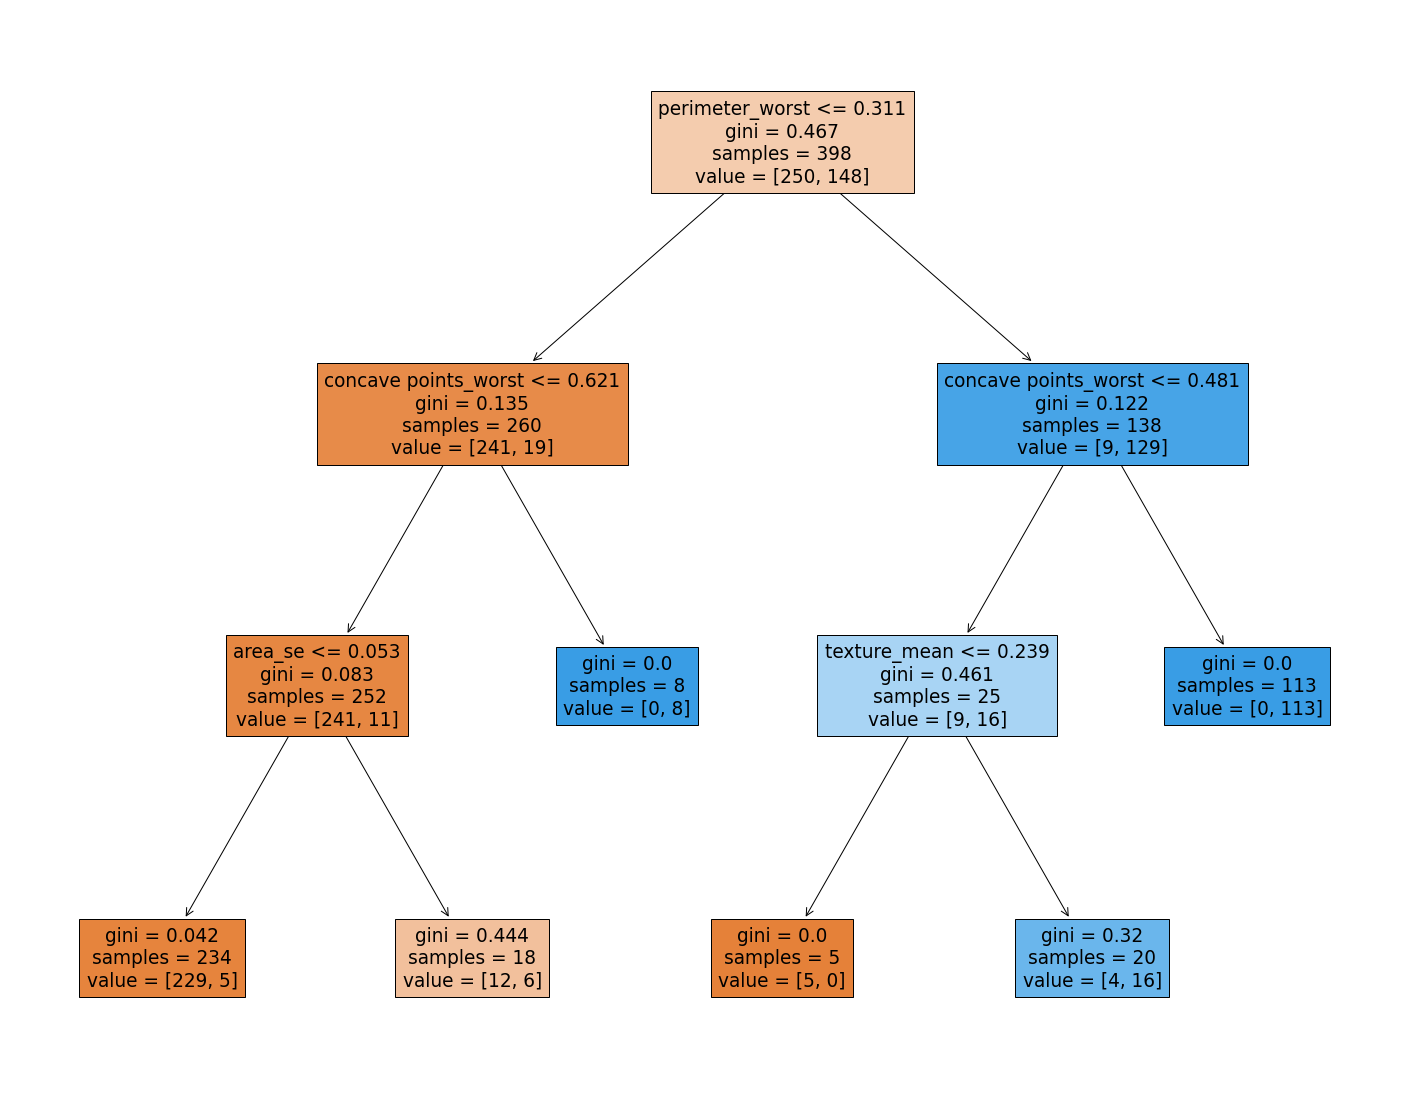

In [87]:
fig = plt.figure(figsize = (25, 20)) 
tree.plot_tree(dt_model, feature_names = X_train.columns.values, filled=True)
fig.savefig("Cancer Decision Tree.png")
plt.show()

## Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
n_estimators_list = [10, 20, 30, 40, 50, 100, 200]
max_depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split_list = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

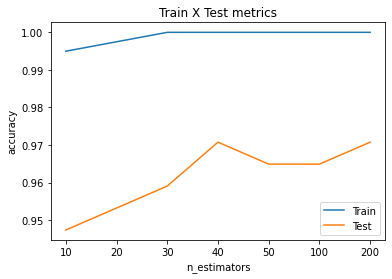

In [91]:
accuracy_train_list = []
accuracy_test_list = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

plt.title('Train X Test metrics')
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_list)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list)), labels = n_estimators_list)
plt.legend(['Train', 'Test'])
plt.show()

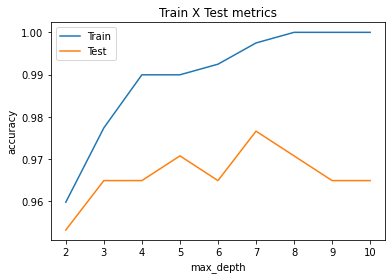

In [92]:
accuracy_train_list = []
accuracy_test_list = []

for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

plt.title('Train X Test metrics')
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_list)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)), labels = max_depth_list)
plt.legend(['Train', 'Test'])
plt.show()

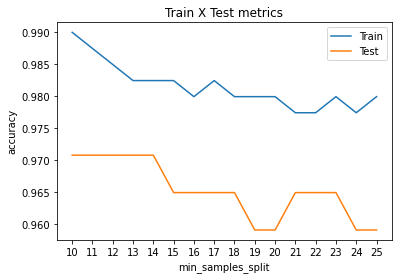

In [93]:
accuracy_train_list = []
accuracy_test_list = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

plt.title('Train X Test metrics')
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_list)
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels = min_samples_split_list)
plt.legend(['Train', 'Test'])
plt.show()

In [94]:
rf_model = RandomForestClassifier(n_estimators = 40, max_depth = 7, min_samples_split = 14, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=14, n_estimators=40,
                       random_state=42)

In [95]:
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

train_test_rf_accuracy = pd.Series({'train': accuracy_score(y_train, rf_train_pred), 
                                    'test': accuracy_score(y_test, rf_test_pred)}, name = 'Accuracy').to_frame().T

train_test_rf_accuracy

,train,test
Accuracy,0.979899,0.97076


In [96]:
evaluate_metrics(y_test, rf_test_pred)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy:   0.97
Precision:  1.0
Recall:     0.92
F1 Score:   0.96


## Support Vector Machine

In [98]:
from sklearn.svm import SVC

In [99]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [100]:
preds = model.predict(X_test)

In [101]:
evaluate_metrics(y_test, preds)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

Accuracy:   0.99
Precision:  1.0
Recall:     0.97
F1 Score:   0.98


In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
params_grid = {'gamma' : [0.01, 0.1, 0.2, 0.3, 0.5, 1], 'C' : [1, 5, 10, 20, 30, 50, 100]}

grid_search = GridSearchCV(estimator = SVC(kernel = 'rbf'), 
                           param_grid = params_grid, 
                           scoring = 'f1', 
                           cv = 5, 
                           verbose = 1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [104]:
best_params

{'C': 30, 'gamma': 0.5}

In [105]:
svm_model = SVC(kernel = 'rbf', C = 30, gamma = 0.5)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

In [106]:
evaluate_metrics(y_test, svm_pred)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy:   0.97
Precision:  1.0
Recall:     0.92
F1 Score:   0.96


In [131]:
y_pred_list = [lr_pred, knn_pred, dt_test_pred, rf_test_pred, svm_pred]
model_name = ['Logistic Regression', 'K-Nearest Neighbours', 'Decision Tree', 'Random Forest', 'Support Vector Machine']
scores = []

for y_pred in y_pred_list:
    scores.append(accuracy_score(y_test, y_pred))

Models = pd.DataFrame({'Model': model_name, 'Scores': scores})

Models.sort_values(by = 'Scores', ascending = False)

,Model,Scores
1,K-Nearest Neighbours,0.982456
0,Logistic Regression,0.970760
3,Random Forest,0.970760
4,Support Vector Machine,0.970760
2,Decision Tree,0.918129


## Confusion Matrix

In [139]:
def error_matrix(yt, yp, mod_name):
    
    plt.figure(figsize = (8, 4))
    
    cm = confusion_matrix(yt, yp)
    ax = sns.heatmap(cm, annot = True, fmt = 'd', annot_kws = {"size": 30, "weight": "bold"})

    ax.set_title(mod_name + '\n', fontsize = 20)

    ax.set_xticklabels(['B', 'M'], fontsize = 15)
    ax.set_yticklabels(['B', 'M'], fontsize = 15)

    ax.set_xlabel('Prediction', fontsize = 15)
    ax.set_ylabel('Actual', fontsize = 15)

    plt.show()

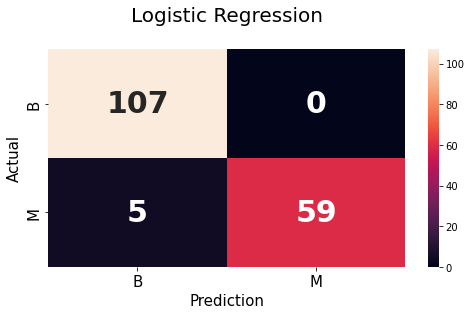

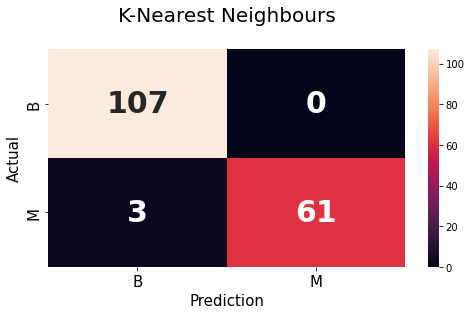

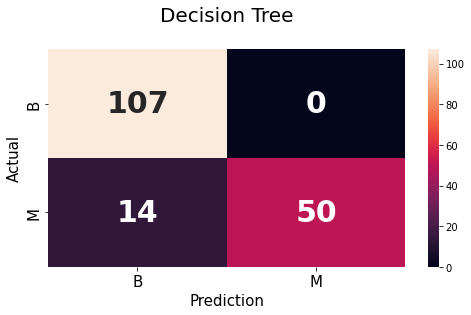

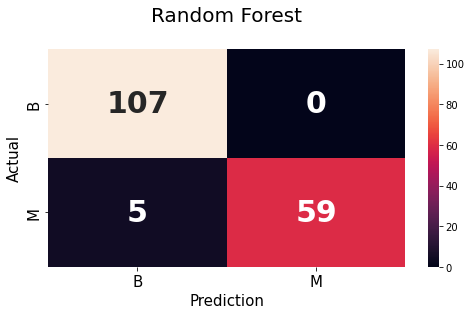

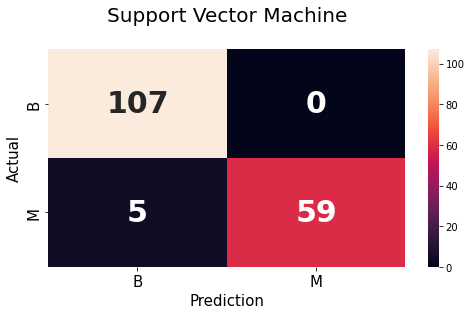

In [140]:
for y_pred, mod_name in zip(y_pred_list, model_name):
    error_matrix(y_test, y_pred, mod_name)